In [0]:

from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,BatchNormalization
model = Sequential()
model.add(LSTM(800, return_sequences=True,
               input_shape=(1, 10)))  
model.add(BatchNormalization())  
model.add(LSTM(800))  
model.add(BatchNormalization())
model.add(Dense(15, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])


model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 800)            2595200   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 800)            3200      
_________________________________________________________________
lstm_2 (LSTM)                (None, 800)               5123200   
_________________________________________________________________
batch_normalization_2 (Batch (None, 800)               3200      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                12015     
Total params: 7,736,815
Trainable params: 7,733,615
Non-trainable params: 3,200
_________________________________________________________________


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
f = open('/content/drive/My Drive/Input.txt', 'r')
x = f.readlines()
f.close()
p=[]
q=[]

for i in x:
  for j in i:
    if(j!='\n' and j!=' '):
      p.append(int(j))
  if(p):
    p=np.array(p[5:])
    q.append(p)
  p=[]
      
    
    
q=np.array(q)
print(q.shape)
print(type(q[1][2]))

q=q.reshape(501,1,10)
print(q.shape)

f = open('/content/drive/My Drive/Output.txt', 'r')
x = f.readlines()
f.close()

l=[]
m=[]

#print(x)

for i in x:
  for j in i:
    if(j!='\n' and j!=' '):
      l.append(int(j))
  if(l):
    l=np.array(l)
    m.append(l)
  l=[]
      

m=np.array(m)
print(m.shape)

(501, 10)
<class 'numpy.int64'>
(501, 1, 10)
(501, 15)


In [0]:
history=model.fit(x=q, y=m, batch_size=10, epochs=50, verbose=1, validation_split=0.2 ,shuffle=True)

Train on 400 samples, validate on 101 samples
Epoch 1/50
400/400 [==============================] - 5s 13ms/step - loss: 0.6685 - acc: 0.7153 - val_loss: 0.5534 - val_acc: 0.7479
Epoch 2/50
400/400 [==============================] - 1s 3ms/step - loss: 0.3914 - acc: 0.7885 - val_loss: 0.3994 - val_acc: 0.8112
Epoch 3/50
400/400 [==============================] - 1s 3ms/step - loss: 0.3381 - acc: 0.8203 - val_loss: 0.3381 - val_acc: 0.8264
Epoch 4/50
400/400 [==============================] - 1s 3ms/step - loss: 0.2888 - acc: 0.8513 - val_loss: 0.2846 - val_acc: 0.8568
Epoch 5/50
400/400 [==============================] - 1s 3ms/step - loss: 0.2565 - acc: 0.8767 - val_loss: 0.2690 - val_acc: 0.8620
Epoch 6/50
400/400 [==============================] - 1s 3ms/step - loss: 0.2331 - acc: 0.8952 - val_loss: 0.2375 - val_acc: 0.8937
Epoch 7/50
400/400 [==============================] - 1s 3ms/step - loss: 0.2121 - acc: 0.9010 - val_loss: 0.1941 - val_acc: 0.9063
Epoch 8/50
400/400 [=========

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


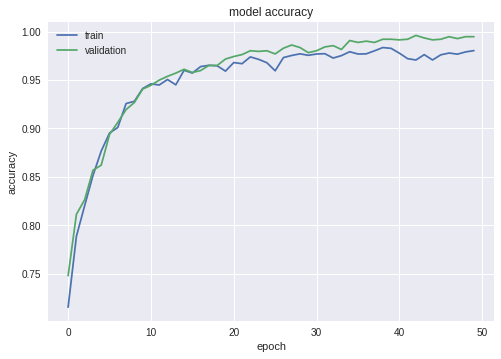

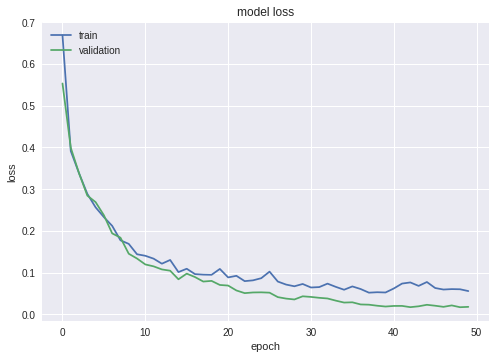

In [0]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
model.evaluate(x=q,y=m,batch_size=10)

501/501 [==============================] - 0s 646us/step


[0.004799739388944656, 0.9989354634237385]

In [0]:
var = model.predict(q)
print(var)

[[9.9997044e-01 9.9999213e-01 9.9999475e-01 ... 3.5420060e-04
  9.8495913e-01 9.9973762e-01]
 [5.6624413e-07 9.8347664e-06 3.5762787e-07 ... 1.3175309e-03
  9.8949587e-01 9.9998736e-01]
 [9.9999774e-01 9.9999928e-01 9.9999976e-01 ... 9.9963301e-01
  9.9584961e-01 1.3060868e-03]
 ...
 [2.3245811e-06 2.9802322e-07 1.2814999e-06 ... 9.9992192e-01
  8.3601594e-01 9.9857879e-01]
 [9.9999982e-01 9.9999988e-01 9.9999738e-01 ... 1.2606382e-05
  6.9831312e-03 1.1992157e-03]
 [1.7881393e-07 2.2649765e-06 1.0937452e-05 ... 1.1287213e-03
  9.9799192e-01 9.9997091e-01]]


In [0]:
print(var.shape)

(501, 15)


In [0]:
import math
ber=0.0
e=[]
enc_bits=[]
av_ber=0.0
for x in range(501):
  for y in range(15):
    if(var[x][y]<0.5):
      a=0
    else:
      a=1
    e.append(a)
    if(m[x][y]!=a):
      ber=ber+1
  enc_bits.append(np.array(e))
  e=[]
  av_ber=av_ber+ber/15
  #print(av_ber)
  ber=0.0
  
av_ber=av_ber/501
print(math.log(av_ber))

enc_bits=np.array(enc_bits)
enc_bits=enc_bits.reshape(501,1,15)

-6.845214760507239


In [0]:
model = Sequential()
model.add(LSTM(800, return_sequences=True,
               input_shape=(1, 15)))  
model.add(BatchNormalization())  
model.add(LSTM(800))  
model.add(BatchNormalization())
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 1, 800)            2611200   
_________________________________________________________________
batch_normalization_11 (Batc (None, 1, 800)            3200      
_________________________________________________________________
lstm_12 (LSTM)               (None, 800)               5123200   
_________________________________________________________________
batch_normalization_12 (Batc (None, 800)               3200      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                8010      
Total params: 7,748,810
Trainable params: 7,745,610
Non-trainable params: 3,200
_________________________________________________________________


In [0]:
q=q.reshape(501,10)

In [0]:
import matplotlib.pyplot as plt

In [0]:
history=model.fit(x=enc_bits, y=q, batch_size=10, epochs=50, verbose=1, validation_split=0.2 ,shuffle=True)

Train on 400 samples, validate on 101 samples
Epoch 1/50
400/400 [==============================] - 5s 14ms/step - loss: 0.6314 - acc: 0.7558 - val_loss: 0.3916 - val_acc: 0.8396
Epoch 2/50
400/400 [==============================] - 1s 3ms/step - loss: 0.2949 - acc: 0.8600 - val_loss: 0.2710 - val_acc: 0.8723
Epoch 3/50
400/400 [==============================] - 1s 3ms/step - loss: 0.2330 - acc: 0.8815 - val_loss: 0.2546 - val_acc: 0.8822
Epoch 4/50
400/400 [==============================] - 1s 3ms/step - loss: 0.1995 - acc: 0.9040 - val_loss: 0.2210 - val_acc: 0.9059
Epoch 5/50
400/400 [==============================] - 1s 3ms/step - loss: 0.1771 - acc: 0.9170 - val_loss: 0.1529 - val_acc: 0.9307
Epoch 6/50
400/400 [==============================] - 1s 3ms/step - loss: 0.1308 - acc: 0.9445 - val_loss: 0.1298 - val_acc: 0.9436
Epoch 7/50
400/400 [==============================] - 1s 3ms/step - loss: 0.1175 - acc: 0.9505 - val_loss: 0.0961 - val_acc: 0.9634
Epoch 8/50
400/400 [=========

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


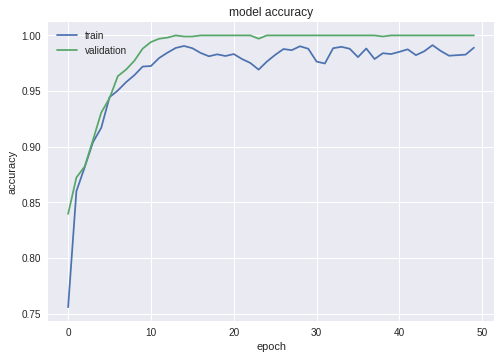

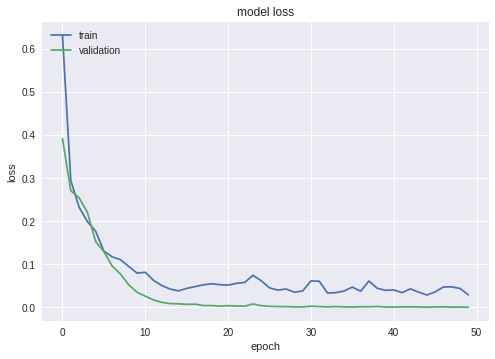

In [0]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
model.evaluate(x=enc_bits , y=q, batch_size=10)


501/501 [==============================] - 0s 605us/step


[0.0006663920955294223, 1.0]

In [0]:
ans=model.predict(enc_bits)
print(ans)

[[9.9999988e-01 9.9997801e-01 2.2094846e-03 ... 4.3290854e-04
  9.9998200e-01 9.9953848e-01]
 [2.6285648e-05 3.2782555e-06 2.4437904e-06 ... 1.7282367e-04
  6.8065524e-04 3.8745999e-04]
 [9.9999940e-01 9.9999386e-01 9.9995083e-01 ... 9.9949801e-01
  9.9998838e-01 9.9997413e-01]
 ...
 [7.6293945e-06 6.2584877e-07 9.9968046e-01 ... 9.9890709e-01
  3.0435503e-02 9.9935216e-01]
 [9.9999958e-01 9.9999994e-01 9.9999726e-01 ... 1.4056861e-03
  2.3221970e-04 7.0989132e-05]
 [2.8282404e-05 1.5497208e-06 4.7683716e-07 ... 1.3351440e-04
  2.0896277e-04 9.9991107e-01]]
